In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
from scipy import constants as const
from scipy.integrate import simps
from scipy.optimize import minimize
from findiff import FinDiff, coefficients, Coefficient

In [2]:
def psi(c, x):
    psi = (c[0] * (x ** 3)) + (c[1] * (x ** 2)) + (c[2] * (x)) + c[3]
    return psi

In [3]:
def psi_n(c, x):
    def integral(c, x):
        integral = (psi(c, x) ** 2)
        return integral
    A = (simps(integral(c, x), x)) ** -0.5
    psi_n = A * psi(c, x)
    return psi_n

In [4]:
def d2psi_n_dx2(c, x):
    dx = x[1] - x[0]
    d2_dx2 = FinDiff(0, dx, 2)
    d2psi_n_dx2 = d2_dx2(psi_n(c, x))
    return d2psi_n_dx2

In [5]:
def V(c, x, L):
    V = []
    for i in x:
        if 0 < i and i < L:
            V.append(0)
        else:
            V.append(50)
    return V

In [6]:
def E(c, x, L):
    E = ((1) / (2)) * (d2psi_n_dx2(c, x) / psi_n(c, x)) + V(c, x, L)
    # I might need a negative above
    return E

In [7]:
def energy_function(c):
    true_energy = ((2 * np.pi) ** 2) / (8 * L ** 2)
    return E(c, x, L)[0] - true_energy

In [8]:
c = [1, 1, 1, 1]
L = 10
x = np.linspace(0, L, 1000)

true_energy = ((2 * np.pi) ** 2) / (8 * L ** 2)

In [9]:
res = minimize(energy_function, c)

energy = E(res.x, x, L)

# Print the ground state energy and corresponding coefficients
print("True ground state energy:", true_energy)
print("Ground state energy:", np.min(energy))
print("Optimized coefficients:", res.x)

True ground state energy: 0.04934802200544679
Ground state energy: -252.60128417907296
Optimized coefficients: [ 1.00095116 -9.66880038  1.00281639  1.98861816]


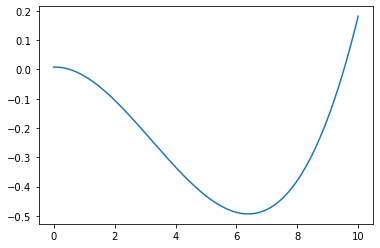

In [10]:
plt.plot(x, psi_n(res.x, x))